In [38]:
import argparse
from f0poly_sols_clean import f0_lambda_neq_0, f0_lambda_eq_0, f_i
from scipy.optimize import bisect, newton
from subprocess import call
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
sys.path.append('../')
from package_global_functions import *


def consensus_usual_eq(q1, pi1, pi2, l, q2, x, mu):
    'usual definition of consensus'
    'equation to be solved numerically'
    'instead of involving the strange F factor, this uses de usual f2-x*f1'
    _, f0, _ = f0_lambda_neq_0(pi1, pi2, q1, q2, l, mu)
    f1, f2 = f_i(1, f0, [pi1, pi2], [q1, q2], l, mu), f_i(2, f0, [pi1, pi2], [q1, q2], l, mu)
    return f2 - x*f1

def consensus_mod2_eq(l, pi1, pi2, q1, q2, x, mu):
    'modification to consensus mod, max(f0, x*f1) instead of x*max(f0,f1)'
    'equation to ve solved numerically'
    _, f0, _  = f0_lambda_neq_0(pi1, pi2, q1, q2, l, mu)
    f1, f2 = f_i(1, f0, [pi1, pi2], [q1, q2], l, mu), f_i(2, f0, [pi1, pi2], [q1, q2], l, mu)
    return f2 - max(f0, x*f1)

def consensus_f2_eq(l, pi1, pi2, q1, q2, x, mu):
    'modified definition of consensus, just considering f2 greater than a threshold'
    _, f0, _ = f0_lambda_neq_0(pi1, pi2, q1, q2, l, mu)
    f1, f2 = f_i(1, f0, [pi1, pi2], [q1, q2], l, mu), f_i(2, f0, [pi1, pi2], [q1, q2], l, mu)
    return f2 - x/(x+1)

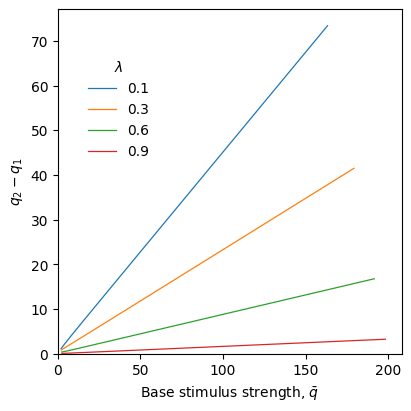

In [80]:
consensus_eq = consensus_usual_eq
Qlabel = 'Q'
# consensus_eq = consensus_f2_eq
# consensus_eq = consensus_usual_eq


q2s = [2.5, 5.0, 10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 100.0, 200.0]

ls = [0.1, 0.3, 0.6, 0.9]
# ls = [0.1, ]
pi1, pi2, x, mu = 0.1, 0.1, 2, 0.0

fig, ax = plt.subplots(1,1, figsize=(4,4), constrained_layout=True)
ax.set(xlabel=r'Base stimulus strength, $\bar{q}$', ylabel='$q_2 - q_1$')
for l in ls:
    q1s = []
    for q2 in q2s:
        q1_solve_lims = [1.0,q2]
        q1 = bisect(consensus_eq, q1_solve_lims[0], q1_solve_lims[1], args=(pi1, pi2, l, q2, x, mu))
        q1s.append(q1)
    # base stimulus strenght:
    bss = [(q2+q1)/2 for q1,q2 in zip(q1s,q2s)]
    # bss = q2s
    # quality difference:
    delta_q = [(q2-q1) for q1,q2 in zip(q1s,q2s)]
    ax.plot(bss, delta_q, lw=0.9, label=f'{l}')
ax.set(ylim=(0,None), xlim=(0,None))
fig.legend(title='$\lambda$', frameon=False, loc=(0.2, 0.6))
fig.savefig(f'test_weber_law_{Qlabel}_pi1_{pi1}_pi2_{pi2}_fix_q2_search_q1.png')


[(6.999999999995608, 10.0), (14.381517155827295, 20.0), (21.76364656543249, 30.0), (29.14536321568564, 40.0), (36.52682858611089, 50.0), (43.908145171366336, 60.0), (73.4327353385338, 100.0), (737.7196109370267, 1000.0)]
[0.3529411764711961, 0.3268315833014619, 0.3182292586035739, 0.31396571742505447, 0.3114218245149412, 0.30973230832086973, 0.30636966671381793, 0.3018673293576338]
For the computed q1s: m = 0.30136514152568844, n = 0.43604918098795054, R^2 = 0.9999999997102413
For the ideal q1s: m = 0.35294117647058826, n = 0.0, R^2 = 1.0


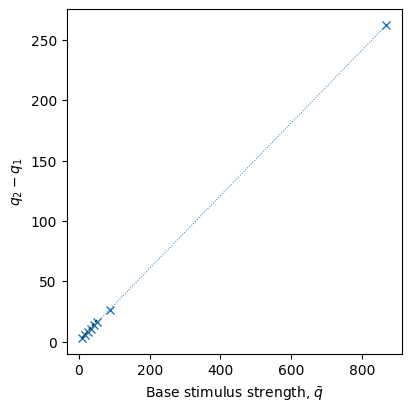

In [78]:
from scipy.stats import linregress

consensus_eq = consensus_usual_eq
q2s = [10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 100.0, 1000.0]
pi1, pi2, x, mu = 0.1, 0.1, 2, 0.0
# l = 0.5
l = 0.2142857142851537 # so that I expect 7.0,10.0

ax.set(xlabel='Base stimulus strength', ylabel='$\Delta q$')
q1s = []
for q2 in q2s:
    q1_solve_lims = [1.0,q2-0.001]
    q1 = bisect(consensus_eq, q1_solve_lims[0], q1_solve_lims[1], args=(pi1, pi2, l, q2, x, mu))
    q1s.append(q1)
print([(q1,q2) for q1,q2 in zip(q1s,q2s)])
print([(q2-q1)/((q2+q1)/2) for q1,q2 in zip(q1s,q2s)])

fig, ax = plt.subplots(1,1, figsize=(4,4),constrained_layout=True)
ax.set(xlabel=r'Base stimulus strength, $\bar{q}$', ylabel='$q_2 - q_1$')
# base stimulus strenght:
bss = [(q2+q1)/2 for q1,q2 in zip(q1s,q2s)]
# quality difference:
delta_q = [(q2-q1) for q1,q2 in zip(q1s,q2s)]
line, = ax.plot(bss, delta_q, lw=0.0, marker='x', label=f'{l}')
res = linregress(bss, delta_q)
print(f'For the computed q1s: m = {res[0]}, n = {res[1]}, R^2 = {res[2]**2}')
ax.plot(bss, [b*res[0]+res[1] for b in bss], color=line.get_color(), ls=':', lw=0.7)


#ideal:
base_q_pair = (7.0, 10.0)
q_pairs = [(base_q_pair[0]*i,base_q_pair[1]*i) for i in range(1,7)]
# q_pairs.append((70.0,100.0))
bss = [(q2+q1)/2 for q1,q2 in q_pairs]
delta_q = [(q2-q1) for q1,q2 in q_pairs]
ax.plot(bss, delta_q, lw=0.7, ls='--', color='k')
res = linregress(bss, delta_q)
print(f'For the ideal q1s: m = {res[0]}, n = {res[1]}, R^2 = {res[2]**2}')
# ax.set_xlim(40,60)
fig.savefig('test_weber_law_q1_7_q2_10.png')

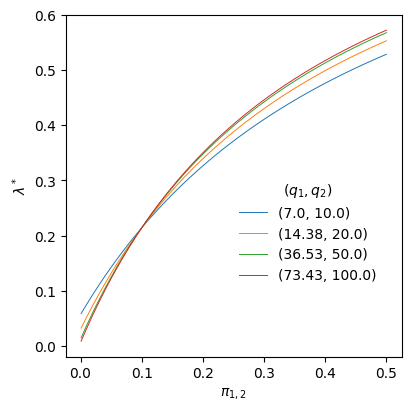

In [87]:
fig, ax = plt.subplots(1,1, figsize=(4,4), constrained_layout=True)
# q_pairs = [(8.67, 10.0), (17.53, 20.0), (88.31, 100.0)]
q_pairs = [(7.0, 10.0), (14.38, 20.0), (36.53,50.0), (73.43, 100.0)]

extSSDpath = getExternalSSDpath()
if os.path.exists(extSSDpath):
    path = extSSDpath + getProjectFoldername() + '/det_sols_from_polynomial/res_files'
else:
    path = '/res_files'

x=2
for q_pair in q_pairs:
    tline = pd.read_csv(f'{path}/Tline_sym_pis_q1_{q_pair[0]}_q2_{q_pair[1]}_f2_{int(x)}f1.csv')
    ax.plot(tline['pi'], tline['lambda'], lw=0.7, label=f'{q_pair}')
ax.set(xlabel='$\pi_{1,2}$', ylabel='$\lambda^*$')
ax.legend(title='$(q_1, q_2)$', frameon=False, loc=(0.5, 0.2))
fig.savefig(f'test_weber_law_QTlines_sym_pi_search_q1_fix_q2_start_from_q1_{q_pairs[0][0]}_q2_{q_pairs[0][1]}.png')

## What if we fix q1 and search q2...

In [81]:
def consensus_usual_eq(q2, pi1, pi2, l, q1, x, mu):
    'usual definition of consensus'
    'equation to be solved numerically'
    'instead of involving the strange F factor, this uses de usual f2-x*f1'
    _, f0, _ = f0_lambda_neq_0(pi1, pi2, q1, q2, l, mu)
    f1, f2 = f_i(1, f0, [pi1, pi2], [q1, q2], l, mu), f_i(2, f0, [pi1, pi2], [q1, q2], l, mu)
    return f2 - x*f1

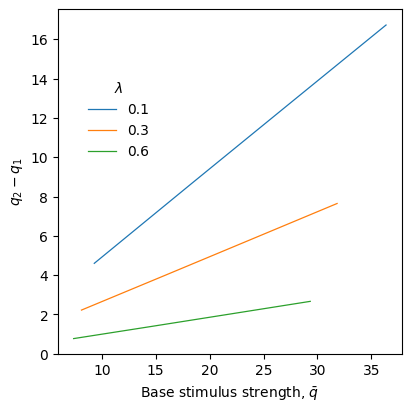

In [83]:
consensus_eq = consensus_usual_eq
Qlabel = 'Q'
# consensus_eq = consensus_f2_eq
# consensus_eq = consensus_usual_eq


q1s = [7.0, 14.0, 21.0, 28.0]

ls = [0.1, 0.3, 0.6]
# ls = [0.1, ]
pi1, pi2, x, mu = 0.1, 0.1, 2, 0.0

fig, ax = plt.subplots(1,1, figsize=(4,4), constrained_layout=True)
ax.set(xlabel=r'Base stimulus strength, $\bar{q}$', ylabel='$q_2 - q_1$')
for l in ls:
    q2s = []
    for q1 in q1s:
        q2_solve_lims = [q1,3*q1]
        q2 = bisect(consensus_eq, q2_solve_lims[0], q2_solve_lims[1], args=(pi1, pi2, l, q1, x, mu))
        q2s.append(q2)
    # base stimulus strenght:
    bss = [(q2+q1)/2 for q1,q2 in zip(q1s,q2s)]
    # bss = q2s
    # quality difference:
    delta_q = [(q2-q1) for q1,q2 in zip(q1s,q2s)]
    ax.plot(bss, delta_q, lw=0.9, label=f'{l}')
ax.set(ylim=(0,None))
fig.legend(title='$\lambda$', frameon=False, loc=(0.2, 0.6))
fig.savefig(f'test_weber_law_{Qlabel}_pi1_{pi1}_pi2_{pi2}_fix_q1_search_q2.png')